<div align="center">

## NLP Project for Career Level Prediction in the US
### Autor : Vinh Tang

</div>

### Libraries import & Settings

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler, SMOTEN
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Step 1 : Data collection : skip because data is already available
### Step between step 1 and step 2: Importing data

In [44]:
df = pd.read_excel("JD_US.ods", engine="odf", dtype=str)
df

,title,location,description,function,industry,career_level
0,Technical Professional Lead - Process,"Houston, TX","Responsible for the study, design, and specifi...",production_manufacturing,Machinery and Industrial Facilities Engineering,senior_specialist_or_project_manager
1,Cnslt - Systems Eng- Midrange 1,"Seattle, WA","Participates in design, development and implem...",information_technology_telecommunications,Financial Services,senior_specialist_or_project_manager
2,SharePoint Developers and Solution Architects,"Dallas, TX",We are currently in need of Developers who can...,consulting,IT Consulting,senior_specialist_or_project_manager
3,Business Information Services - Strategic Acco...,North Carolina,Experian is seeking an experienced Account Exe...,sales,"Security, Risk, Restructuring Consulting",senior_specialist_or_project_manager
4,Strategic Development Director (procurement),"Austin, TX",Â Want to join a world-class global procuremen...,procurement_materials_logistics,Information Technology,bereichsleiter
...,...,...,...,...,...,...
8069,Sales Engineer,"Waltham, MA",You are the primary technical resource for the...,sales,Hardware,senior_specialist_or_project_manager
8070,"Director of Sales, ClosetMaid","Atlanta, GA",Act as the primary contact for Home Depot deci...,sales,Furniture,senior_specialist_or_project_manager
8071,PROPERTY MANAGEMENT: Regional Vice President,"Los Angeles, CA","Responsible for the management of office, mult...",finance_accounting,Real Estate Investment Companies,manager_team_leader
8072,Technical Manager SAP Senior,New York,Viseo Business Solution Practice invested in S...,consulting,IT Consulting,senior_specialist_or_project_manager


In [45]:
# Replace "bereichsleiter" value with "head_division" for clarity
df["career_level"] = df["career_level"].replace("bereichsleiter", "head_division")
df

,title,location,description,function,industry,career_level
0,Technical Professional Lead - Process,"Houston, TX","Responsible for the study, design, and specifi...",production_manufacturing,Machinery and Industrial Facilities Engineering,senior_specialist_or_project_manager
1,Cnslt - Systems Eng- Midrange 1,"Seattle, WA","Participates in design, development and implem...",information_technology_telecommunications,Financial Services,senior_specialist_or_project_manager
2,SharePoint Developers and Solution Architects,"Dallas, TX",We are currently in need of Developers who can...,consulting,IT Consulting,senior_specialist_or_project_manager
3,Business Information Services - Strategic Acco...,North Carolina,Experian is seeking an experienced Account Exe...,sales,"Security, Risk, Restructuring Consulting",senior_specialist_or_project_manager
4,Strategic Development Director (procurement),"Austin, TX",Â Want to join a world-class global procuremen...,procurement_materials_logistics,Information Technology,head_division
...,...,...,...,...,...,...
8069,Sales Engineer,"Waltham, MA",You are the primary technical resource for the...,sales,Hardware,senior_specialist_or_project_manager
8070,"Director of Sales, ClosetMaid","Atlanta, GA",Act as the primary contact for Home Depot deci...,sales,Furniture,senior_specialist_or_project_manager
8071,PROPERTY MANAGEMENT: Regional Vice President,"Los Angeles, CA","Responsible for the management of office, mult...",finance_accounting,Real Estate Investment Companies,manager_team_leader
8072,Technical Manager SAP Senior,New York,Viseo Business Solution Practice invested in S...,consulting,IT Consulting,senior_specialist_or_project_manager


In [46]:
df.info(); df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8074 entries, 0 to 8073
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         8074 non-null   object
 1   location      8074 non-null   object
 2   description   8073 non-null   object
 3   function      8074 non-null   object
 4   industry      8074 non-null   object
 5   career_level  8074 non-null   object
dtypes: object(6)
memory usage: 378.6+ KB


,title,location,description,function,industry,career_level
count,8074,8074,8073,8074,8074,8074
unique,6790,1081,7973,19,352,6
top,Account Manager,"New York City, NY",Practice Medicine in Northern California with ...,sales,Software Companies,senior_specialist_or_project_manager
freq,58,401,5,3151,688,4338


Because the "description" column has exactly one NULL row, I don't need to fill it, so I just drop that row

In [47]:
df = df.dropna(axis=0, how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8073 entries, 0 to 8073
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         8073 non-null   object
 1   location      8073 non-null   object
 2   description   8073 non-null   object
 3   function      8073 non-null   object
 4   industry      8073 non-null   object
 5   career_level  8073 non-null   object
dtypes: object(6)
memory usage: 441.5+ KB


I edit the "location" column and keep only the state information. After, I use the `apply()` function to apply the `filter_state` function to each row of the data column.

In [48]:
def filter_state(location_value):
    state = re.findall(r",\s[A-Z]{2}$", location_value)
    if len(state) > 0:
        return state[0][2:4]
    else:
        return location_value

In [49]:
df.loc[:, "location"] = df["location"].apply(filter_state)
df["location"]


0                   TX
1                   WA
2                   TX
3       North Carolina
4                   TX
             ...      
8069                MA
8070                GA
8071                CA
8072          New York
8073                NJ
Name: location, Length: 8073, dtype: object

### Data division step

Identify features and target

In [50]:
# identify target
target = "career_level"

x = df.drop(target, axis=1)
y = df[target]

Identify train set, validation test and test set

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42, stratify=y)

print(f" Shape of train set is {x_train.shape} on x and {y_train.shape} on y")
print(f" Shape of test set is {x_test.shape} on x and {y_test.shape} on y")
print("\n")
print(f"- Nb of samples of train set is \n{y_test.value_counts()} \n\n- And of test set is \n{y_train.value_counts()}")

oversampling = SMOTEN(random_state=42, k_neighbors=2, sampling_strategy={
    "head_division" : 1000,
    "director_business_unit_leader" : 500,
    "specialist" : 500,
    "managing_director_small_medium_company" : 500
})
x_train, y_train = oversampling.fit_resample(x_train, y_train)
print("\n")
print(f"- Nb of samples of train set AFTER OVER SAMPLING W/ STRATEGY is \n{y_train.value_counts()}")


 Shape of train set is (6458, 5) on x and (6458,) on y
 Shape of test set is (1615, 5) on x and (1615,) on y


- Nb of samples of train set is 
career_level
senior_specialist_or_project_manager      868
manager_team_leader                       534
head_division                             192
director_business_unit_leader              14
specialist                                  6
managing_director_small_medium_company      1
Name: count, dtype: int64 

- And of test set is 
career_level
senior_specialist_or_project_manager      3469
manager_team_leader                       2138
head_division                              768
director_business_unit_leader               56
specialist                                  24
managing_director_small_medium_company       3
Name: count, dtype: int64


- Nb of samples of train set AFTER OVER SAMPLING W/ STRATEGY is 
career_level
senior_specialist_or_project_manager      3469
manager_team_leader                       2138
head_division         

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42, stratify=y)

print(f" Shape of train set is {x_train.shape} on x and {y_train.shape} on y")
print(f" Shape of test set is {x_test.shape} on x and {y_test.shape} on y")
print("\n")
print(f"- Nb of samples of train set is \n{y_test.value_counts()} \n\n- And of test set is \n{y_train.value_counts()}")

# ---------- Balanced Samplinng (Ở đây ta dùng Over Sampling) (Chỉ dùng bước này áp dụng vào bộ train chứ không áp dụng cho bộ test) ----------
# - RandomOverSampler : phương thức này sẽ giúp mô hình gặp các dữ liệu THƯỜNG XUYÊN HƠN CHỨ KHÔNG ĐA DẠNG HƠN
# - SMOTE : phương thức này sẽ giúp mô hình tạo ra những dữ liệu mới CHIA SẺ ĐẶC ĐIỂM NHƯNG KHÔNG GIỐNG DỮ LIỆU CŨ, chỉ dành cho tập dữ liệu số
# - SMOTENC : tương tự SMOTE, chỉ dành cho tập dữ liệu có ít nhất một feature số
# - SMOTENC : tương tự SMOTE, chỉ dành cho tập dữ liệu chuỗi

oversampling = SMOTEN(random_state=42, k_neighbors=2)
x_train_os_non_strategy, y_train_os_non_strategy = oversampling.fit_resample(x_train, y_train)


print("\n")
print(f"- Nb of samples of train set AFTER OVER SAMPLING W/OUT STRATEGY is \n{y_train_os_non_strategy.value_counts()}")

# ---------- Vấn đề của Over Sampling : TẠO RA QUÁ NHIỀU BIẾN MỚI CHO CLASS THIỂU SỐ TRONG CỘT TARGET CỦA BỘ TRAIN ----------
# - Thuật toán Balanced Data, gọi là cân bằng dữ liệu, nhưng thật ra bản chất là giúp dữ liệu **đỡ mất cân bằng** thôi và **nó chỉ được thực hiện trên bộ dữ liệu train**
# - Với bài toán phân loại, khi phân chia ra các bộ train, validation, test, ta phải đảm bảo rằng phân bố của cả ba bộ này là như nhau. Nhưng nếu dùng Over Sampling 
#   thì sẽ không thể đảm bảo được điều này và làm mất phân bố ban đầu của bộ data mà ta làm. 
# => Đây là một sự đánh đổi, dùng Over Sampling (hoặc Under Sampling) sẽ làm mất cân bằng và phân phối ban đầu của bộ dữ liệu nhưng sẽ giúp tăng độ chính xác của mô hình nhờ 
#    việc mô hình được gặp các class thiểu số nhiều hơn. Vậy để cân bằng giữa việc tăng độ chính xác và giữ nguyên phân bố ban đầu của dữ liệu thì ta có thể sử dụng parameter **sampling_strategy** 
#    để chỉ ra với mỗi class ta muốn tăng lên/giảm xuống đến bao nhiêu mẫu (không nhắc đến nghĩa là không tăng/giảm).

oversampling = SMOTEN(random_state=42, k_neighbors=2, sampling_strategy={
    "head_division" : 1000,
    "director_business_unit_leader" : 500,
    "specialist" : 500,
    "managing_director_small_medium_company" : 500
})
x_train_os_with_strategy, y_train_os_with_strategy = oversampling.fit_resample(x_train, y_train)
print("\n")
print(f"- Nb of samples of train set AFTER OVER SAMPLING W/ STRATEGY is \n{y_train_os_with_strategy.value_counts()}")


 Shape of train set is (6458, 5) on x and (6458,) on y
 Shape of test set is (1615, 5) on x and (1615,) on y


- Nb of samples of train set is 
career_level
senior_specialist_or_project_manager      868
manager_team_leader                       534
head_division                             192
director_business_unit_leader              14
specialist                                  6
managing_director_small_medium_company      1
Name: count, dtype: int64 

- And of test set is 
career_level
senior_specialist_or_project_manager      3469
manager_team_leader                       2138
head_division                              768
director_business_unit_leader               56
specialist                                  24
managing_director_small_medium_company       3
Name: count, dtype: int64


- Nb of samples of train set AFTER OVER SAMPLING W/OUT STRATEGY is 
career_level
manager_team_leader                       3469
senior_specialist_or_project_manager      3469
head_division      

### String data preprocessing step:

In [11]:
# Check the individual values of each feature to decide whether to apply TF-IDF or One Hot Encoding to that feature
# Recall: >100 individual values then use TF-IDF, =<100 then use One Hot Encoding

for col in x_train.columns:
    num_unique = df[col].nunique() # Calculate the number of distinct values of each feature, like len(df[col].unique())
    if num_unique > 100:
        print(f"- {col} has {num_unique} unique value → Must use TF-IDF")
    else:
        print(f"- {col} has {num_unique} unique value → Must use One Hot Encoding")

- title has 6789 unique value → Must use TF-IDF
- location has 97 unique value → Must use One Hot Encoding
- description has 7973 unique value → Must use TF-IDF
- function has 19 unique value → Must use One Hot Encoding
- industry has 352 unique value → Must use TF-IDF


In [12]:
text_preprocessor = ColumnTransformer(transformers=[ 
    ("title_col", TfidfVectorizer(stop_words="english", ngram_range=(1,1)), "title"),
    ("location_col", OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist', min_frequency=5), ["location"]),
    ("description_col", TfidfVectorizer(stop_words="english", ngram_range=(1,2), min_df=0.01, max_df=0.99), "description"), 
    ("function_col", OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist', min_frequency=5), ["function"]),
    ("industry_col", TfidfVectorizer(stop_words="english", ngram_range=(1,1)), "industry")])

text_preprocessor 




ColumnTransformer(transformers=[('title_col',
                                 TfidfVectorizer(stop_words='english'),
                                 'title'),
                                ('location_col',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               min_frequency=5,
                                               sparse_output=False),
                                 ['location']),
                                ('description_col',
                                 TfidfVectorizer(max_df=0.99, min_df=0.01,
                                                 ngram_range=(1, 2),
                                                 stop_words='english'),
                                 'description'),
                                ('function_col',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               min_frequency=5,
                                               sparse_output=False),
                                 ['function']),
                                ('industry_col',
                                 TfidfVectorizer(stop_words='english'),
                                 'industry')])

In [13]:
step_preprocessing = Pipeline(steps= [
    ("preprocessor", text_preprocessor),
    ("feature_selector", SelectKBest(chi2, k=800)) # SelectKBest dùng khi đã biết trước số feature, nếu ko biết, dùng SelectPercentile để giữ lại số lượng % features tốt nhất
    # ("feature_selector", SelectPercentile(chi2, percentile=5))
])

processed_data = step_preprocessing.fit_transform(x_train, y_train)
processed_data.shape

(6458, 800)

### Step Select Model

We choose **NONLINEAR MODEL** as `RandomForestClassifier`

In [14]:
model = Pipeline(steps= [
    ("preprocessor", text_preprocessor),
    # ("feature_seleciton", SelectKBest(chi2, k=800)),
    ("feature_selector", SelectPercentile(chi2, percentile=5)),
    ("classifier", RandomForestClassifier(random_state=42))
])

params = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__criterion": ["gini", "entropy", "log_loss"],
    "classifier__max_depth": [None, 5, 10, 20],
    "classifier__min_samples_split" : [2, 5],
    "feature_selector__percentile": [1, 5, 10]
}

scores = {
    'precision_macro': 'precision_macro',
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted',
    'roc_auc_ovr': 'roc_auc_ovr',
    'roc_auc_ovo': 'roc_auc_ovo'
}

grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, cv=2, 
                           scoring=scores, refit = 'roc_auc_ovr', 
                           n_jobs=-1, verbose=2, 
                           error_score='raise') # error_score='raise' nghĩa là nếu trong quá trình chạy model và tìm kiếm không tìm thấy giá trị nào thì sẽ raise lỗi


We let the machine learn and predict based on model by GridSearchCV

In [15]:
grid_search.fit(x_train, y_train);

Fitting 2 folds for each of 216 candidates, totalling 432 fits


Since I used **multi-metrics scoring** to input into the scoring parameter, now I have to print out the metrics sets with the best performance to choose from, by default I set **refit = roc_auc_ovr** if there is any better metric then I will replace it

In [16]:
import pandas as pd


results = pd.DataFrame(grid_search.cv_results_)

score_cols = sorted([col for col in results.columns if col.startswith('mean_test_')])


best_indices = {col: results[col].idxmax() for col in score_cols}


summary_rows = []

for col in score_cols:
    idx = best_indices[col]
    summary_rows.append({
        'metric': col.replace('mean_test_', ''),
        'score': results[col][idx],
        'params': results['params'][idx]
    })

summary_df = pd.DataFrame(summary_rows).sort_values(by='score', ascending=False)

print(summary_df)


               metric     score  \
4         roc_auc_ovr  0.914991   
3         roc_auc_ovo  0.848123   
1  precision_weighted  0.756670   
2     recall_weighted  0.752090   
0     precision_macro  0.562141   

                                              params  
4  {'classifier__criterion': 'gini', 'classifier_...  
3  {'classifier__criterion': 'entropy', 'classifi...  
1  {'classifier__criterion': 'gini', 'classifier_...  
2  {'classifier__criterion': 'gini', 'classifier_...  
0  {'classifier__criterion': 'gini', 'classifier_...  


In [17]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_index_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('title_col',
                                                  TfidfVectorizer(stop_words='english'),
                                                  'title'),
                                                 ('location_col',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=5,
                                                                sparse_output=False),
                                                  ['location']),
                                                 ('description_col',
                                                  TfidfVectorizer(max_df=0.99,
                                                                  min_df=0.01,
                                                                  ngram_range=(1,
                                              

#### pickle library :


In [18]:
filename = "model_nlp.pkl"
pickle.dump(grid_search, open("model_nlp.pkl", "wb"))

### Model evaluating Step

In [19]:

model_from_pickle = pickle.load(open('model_nlp.pkl','rb'))

y_predict = model_from_pickle.predict(x_test)

In [20]:
print(f"The Accuracy score of the entire test set is: {accuracy_score(y_test, y_predict)}")
print(f"The Precision score of the entire test set is: {precision_score(y_test, y_predict, average='weighted')}")
print(f"The Recall score of the entire test set is: {recall_score(y_test, y_predict, average='weighted')}")
print(f"The F1 score of the entire test set is: {f1_score(y_test, y_predict, average='weighted')}")


The Accuracy score of the entire test set is: 0.7479876160990712
The Precision score of the entire test set is: 0.7429221153670384
The Recall score of the entire test set is: 0.7479876160990712
The F1 score of the entire test set is: 0.7096447186761787


c:\Users\KTANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
print(f"Report is : \n {classification_report(y_test, y_predict)}")

Report is : 
                                         precision    recall  f1-score   support

         director_business_unit_leader       1.00      0.14      0.25        14
                         head_division       0.70      0.07      0.13       192
                   manager_team_leader       0.63      0.74      0.68       534
managing_director_small_medium_company       0.00      0.00      0.00         1
  senior_specialist_or_project_manager       0.82      0.92      0.87       868
                            specialist       0.00      0.00      0.00         6

                              accuracy                           0.75      1615
                             macro avg       0.53      0.31      0.32      1615
                          weighted avg       0.74      0.75      0.71      1615



c:\Users\KTANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KTANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KTANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

c:\Users\KTANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KTANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KTANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

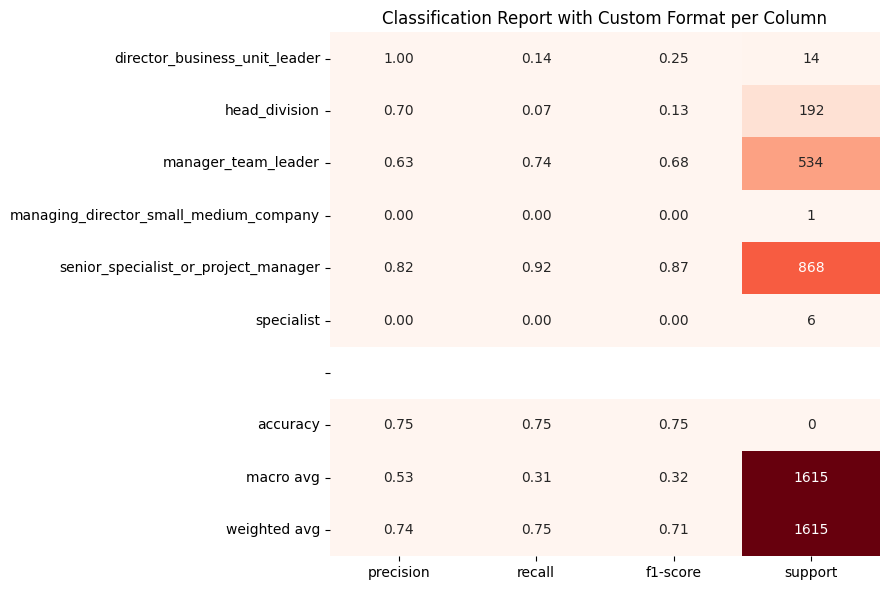

In [22]:
report = classification_report(y_test, y_predict, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report['support'] = df_report['support'].astype(int)
blank_row = pd.DataFrame([[np.nan, np.nan, np.nan, np.nan]], index=[''], columns=['precision', 'recall', 'f1-score', 'support'])
summary_labels = ['accuracy', 'macro avg', 'weighted avg']
class_labels = [idx for idx in df_report.index if idx not in summary_labels and idx != '']
df_plot = pd.concat([
    df_report.loc[class_labels],
    blank_row,
    df_report.loc[summary_labels]
])

annot = df_plot.copy().astype(str)

for row in annot.index:
    for col in annot.columns:
        val = df_plot.loc[row, col]
        if pd.isna(val):
            annot.loc[row, col] = ''
        elif col == 'support':
            annot.loc[row, col] = f"{val:.0f}"  
        else:
            annot.loc[row, col] = f"{val:.2f}"  


plt.figure(figsize=(9, 6))
sns.heatmap(df_plot, annot=annot.values, fmt="", cmap="Reds", cbar=False)
plt.title("Classification Report with Custom Format per Column")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



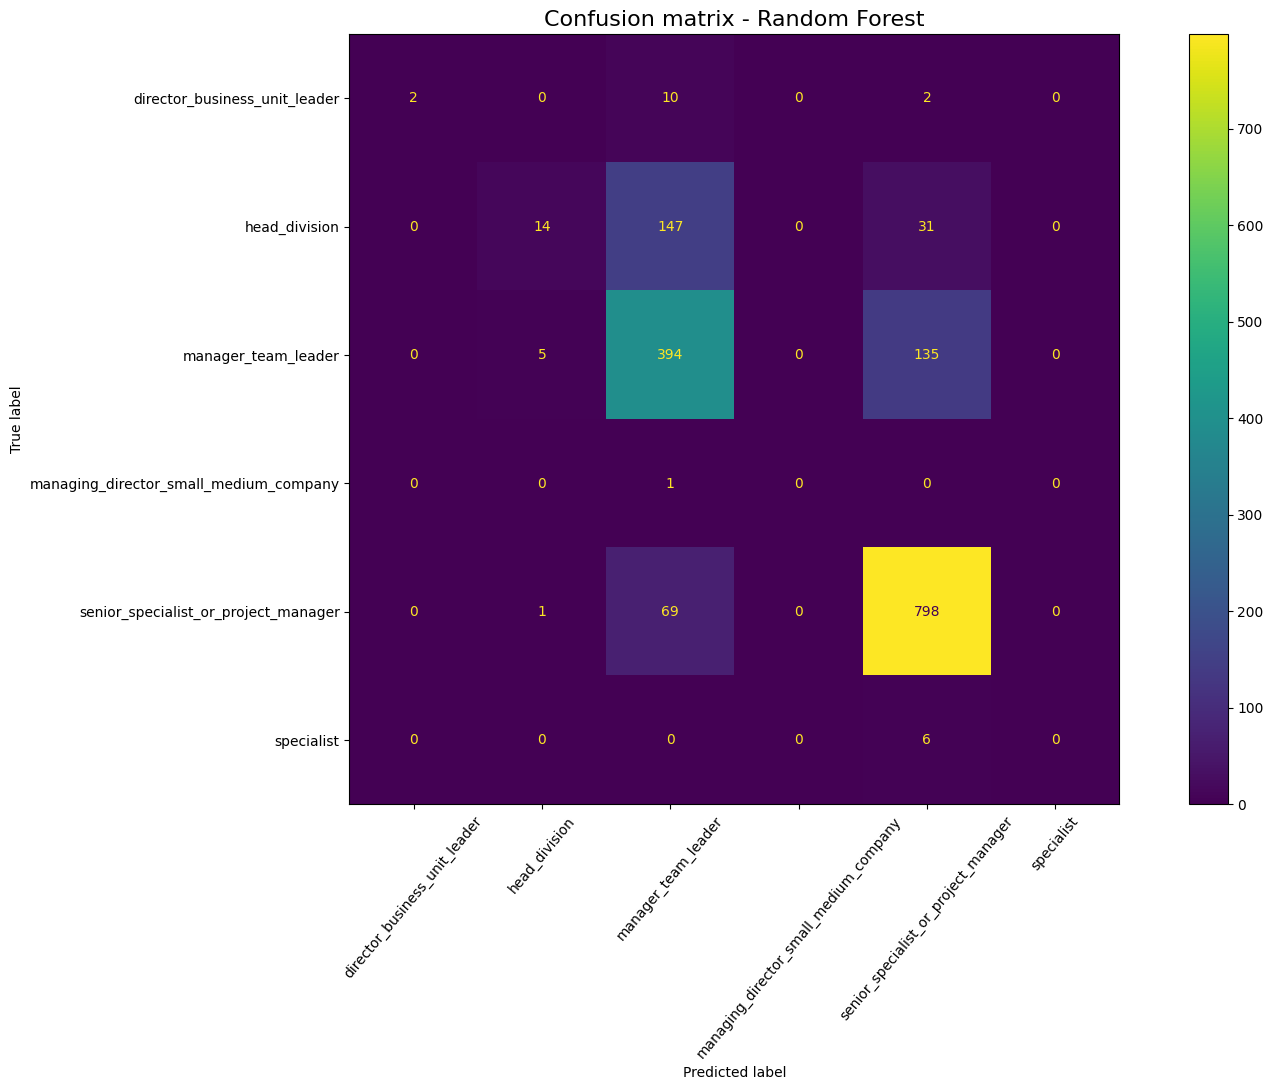

In [51]:
cm = confusion_matrix(y_test, y_predict, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)

fig, ax = plt.subplots(figsize=(18, 10))  
disp.plot(ax=ax, xticks_rotation=50)
ax.set_title("Confusion matrix - Random Forest", fontsize=16);


Run other models quickly to compare performance

In [24]:
applied_step_preprocessing_to_features = Pipeline(steps= [
    ("preprocessor", text_preprocessor)
])

x_train_for_training = applied_step_preprocessing_to_features.fit_transform(x_train)
x_test_for_training = applied_step_preprocessing_to_features.transform(x_test) # Ng.lý : chỉ transform trên bộ test

models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "GaussianNB": GaussianNB()
}

results = []

for name, model in models.items():
    if name == "GaussianNB": # The GaussianNB model does not accept sparse matrices created from Tfidf in the preprocessing step, so it must be separated.
        x_train_input = x_train_for_training.toarray()
        x_test_input = x_test_for_training.toarray()
    else:
        x_train_input = x_train_for_training
        x_test_input = x_test_for_training

    model.fit(x_train_input, y_train)
    y_pred = model.predict(x_test_input)

    try:
        y_proba = model.predict_proba(x_test_input)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except:
        auc = None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append([name, acc, auc, f1])


df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC AUC", "F1 Score"])
df = df.sort_values("Accuracy", ascending=False)
print(df)


          Model  Accuracy   ROC AUC  F1 Score
2           SVC  0.770279  0.928835  0.753752
0  RandomForest  0.731269  0.817637  0.688743
3           KNN  0.691641  0.762817  0.681815
1  DecisionTree  0.659443  0.627196  0.657194
4    GaussianNB  0.299071  0.539517  0.312512


<div align="center">

### - END -

</div>
